In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy, LinearAnnealedPolicy
from rl.memory import SequentialMemory

Using TensorFlow backend.


In [2]:
from ReactorCool import simulator

In [3]:
env = simulator()
nb_actions = env.action_space.n
env.observation_space, env.action_space

(Box(2,), Discrete(3))

In [4]:
print(env.T)
env.step(1), env.step(2), env.step(3)
print(env.T)

[600]
[600, 580.0, 600.0, 600.0]


In [5]:
y = [] 
x = []
CSTR = []
PFR = []

for i in range(0, 50):
    test1 = simulator()
    test2 = simulator()
    x.append(i/50)
    test1.X.append(i/50)
    test2.X.append(i/50)
    test1.simulate(0)
    test2.simulate(1)
    CSTR.append(test1.state[0])
    PFR.append(test2.state[0])
    if CSTR[-1] >0.999 or PFR[-1] > 0.999: break

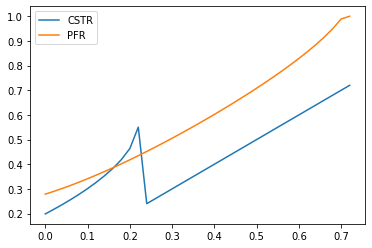

In [6]:
plt.plot(x, CSTR)
plt.plot(x, PFR)
plt.legend(["CSTR", "PFR"])

In [26]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(nb_actions, activation = 'linear'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 51        
Total params: 643
Trainable params: 643
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05, nb_steps=10000)
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=9,
    target_model_update=1e-2, policy=policy, gamma = 0.9)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [38]:
hist = dqn.fit(env, nb_steps=20000)

Training for 30000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 42s 4ms/step - reward: 0.0783
1111 episodes - episode_reward: 0.705 [0.000, 1.000] - loss: 0.002 - mean_absolute_error: 0.207 - mean_q: 0.330 - mean_eps: 0.550

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 39s 4ms/step - reward: 0.0912
1111 episodes - episode_reward: 0.821 [0.501, 1.000] - loss: 0.002 - mean_absolute_error: 0.199 - mean_q: 0.319 - mean_eps: 0.100

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 36s 4ms/step - reward: 0.0919
done, took 116.977 seconds


In [29]:
print(hist.history.keys())

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


In [30]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

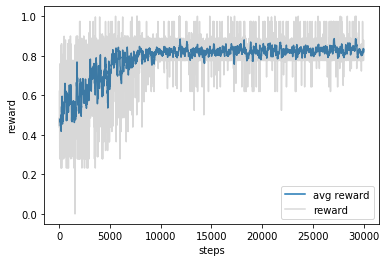

In [39]:
smoothed_rews = running_mean(hist.history['episode_reward'], 10)
plt.plot(hist.history['nb_steps'][-len(smoothed_rews):], smoothed_rews)
plt.plot(hist.history['nb_steps'],hist.history['episode_reward'],color='grey', alpha=0.3)
plt.xlabel("steps")
plt.ylabel("reward")
plt.legend(["avg reward", "reward"])

In [40]:
dqn.test(env, visualize = True)

Testing for 1 episodes ...
choice(1) -  units: ['PFR'], conversions: [0, 0.2787397576589022], Temps: [600, 580.0]
choice(2) -  units: ['PFR', 'PFR'], conversions: [0, 0.2787397576589022, 0.4168876523576247], Temps: [600, 580.0, 560.0]
choice(3) -  units: ['PFR', 'PFR', 'Cooler'], conversions: [0, 0.2787397576589022, 0.4168876523576247, 0.4168876523576247], Temps: [600, 580.0, 560.0, 600.0]
choice(4) -  units: ['PFR', 'PFR', 'Cooler', 'PFR'], conversions: [0, 0.2787397576589022, 0.4168876523576247, 0.4168876523576247, 0.6191647713474027], Temps: [600, 580.0, 560.0, 600.0, 580.0]
choice(5) -  units: ['PFR', 'PFR', 'Cooler', 'PFR', 'PFR'], conversions: [0, 0.2787397576589022, 0.4168876523576247, 0.4168876523576247, 0.6191647713474027, 0.7763555553100918], Temps: [600, 580.0, 560.0, 600.0, 580.0, 560.0]
choice(6) -  units: ['PFR', 'PFR', 'Cooler', 'PFR', 'PFR', 'Cooler'], conversions: [0, 0.2787397576589022, 0.4168876523576247, 0.4168876523576247, 0.6191647713474027, 0.7763555553100918, 0.

In [35]:
env.unit_seq

['PFR', 'PFR', 'PFR', 'PFR', 'Cooler', 'PFR', 'PFR', 'PFR', 'Cooler']

In [41]:
y = [] 
x = []
CSTR = []
PFR = []

for i in range(0, 50):
    test1 = simulator()
    test2 = simulator()
    x.append(i/50)
    test1.X.append(i/50)
    test2.X.append(i/50)
    test1.simulate(0)
    test2.simulate(1)
    CSTR.append(test1.state[0])
    PFR.append(test2.state[0])
    if CSTR[-1] >0.999 or PFR[-1] > 0.999: break

Text(0, 0.5, 'x next')

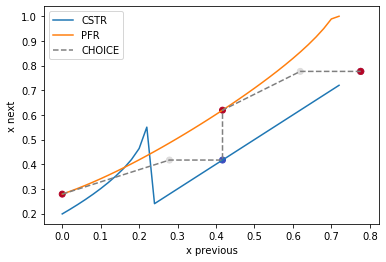

In [60]:
x_sim = env.X[0:-1]
temps = env.T[0:-1]
choice = env.X[1:]
plt.plot(x, CSTR)
plt.plot(x, PFR)
plt.plot(x_sim, choice, linestyle = '--', c = 'tab:grey')
plt.scatter(x_sim, choice, c = temps, cmap = 'coolwarm')
plt.legend(["CSTR", "PFR", "CHOICE"])
plt.xlabel("x previous")
plt.ylabel("x next")

In [32]:
??dqn

In [39]:
??env

In [10]:
??dqn.fit

In [9]:
??dqn.forward

In [24]:
??SequentialMemory